# Ï†ÑÏ≤¥(ÏøºÏπ¥+Í≥µÏûë+ÏπòÌÉÄ+ÌÜ†ÎÅº+Îã§ÎûåÏ•ê) Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù 

* Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ
    * ÎèÖÎ¶ΩÎ≥ÄÏàò : sleep_score + sleep_time + yesterday_satisfaction + C(class_check)
    * ÏàòÏ†ïrÏ†úÍ≥± : 0.363(36%)
    * Ìï¥ÏÑù : Ïò§Îäò ÎÇòÏùò Ï†êÏàòÎ•º ÎÜíÍ≤å ÏãúÏûëÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ï†ÑÎÇ† ÎàÑÍ∞Ä ÏóÖÏñ¥Í∞ÄÎèÑ Î™®Î•º Ï†ïÎèÑÎ°ú Ï∂©Î∂ÑÌïú ÏãúÍ∞Ñ ÎèôÏïà Ìëπ Ïûò ÏûêÍ≥†, Î≥∏Ïù∏Ïù¥ ÎßåÏ°±ÌïòÎäî ÌïòÎ£®Î•º Î≥¥ÎÇ¥ÏïºÌïúÎã§. Îã§Î•∏ Î≥ÄÏàòÎäî ÌÅ∞ ÏòÅÌñ•Ïù¥ ÏóÜÎã§.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc # Ìè∞Ìä∏
#ÌïúÍ∏ÄÌè∞Ìä∏ Ï†ÅÏö©-----------------------------
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
#-----------------------------------------


from datetime import datetime
import time
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
# datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ÌååÏùºÏù¥ ÏûàÎäî Í≤ΩÎ°ú ÏßÄÏ†ï
path = 'C:\\Users\\USER\\ÌÜµÍ≥Ñ\\mini\\'

# Îç∞Ïù¥ÌÑ∞ import

In [2]:
df = pd.read_excel(path +"today_score_data.xlsx")

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [3]:
#Îç∞Ïù¥ÌÑ∞ Î™®Ïñë ÌôïÏù∏
df.head()

cnt    name  today_score       date  dayofweek  dayofweek_check  avg_temp  \
0    1  quokka            9 2022-09-28          4                0      20.4   
1    2  quokka            6 2022-09-29          5                0      20.4   
2    3  quokka            4 2022-09-30          6                0      20.7   
3    4  quokka            7 2022-10-01          7                1      20.9   
4    5  quokka            7 2022-10-02          1                1      19.4   

   low_temp  high_temp  precipitation  ...  yesterday_exercise_time  \
0      16.1       26.1            0.0  ...                       70   
1      16.4       26.5            0.0  ...                        0   
2      14.8       27.7            0.0  ...                        0   
3      14.4       27.6            0.0  ...                        0   
4      17.2       21.6           15.8  ...                        0   

   yesterday_step_cnt yesterday_drinking period  caffeine  \
0               11772                  0      0         0   
1                5800                  0      0         0   
2                2775                  0      0         0   
3                4365                  0      0         0   
4               13541                  0      0         1   

   yesterday_satisfaction  gotobed_range  getup_range  gotobed_late  \
0                       2           03ÏãúÎåÄ         08ÏãúÎåÄ             1   
1                       3           03ÏãúÎåÄ         08ÏãúÎåÄ             1   
2                       4           05ÏãúÎåÄ         10ÏãúÎåÄ             1   
3                       3           05ÏãúÎåÄ         07ÏãúÎåÄ             1   
4                       4           03ÏãúÎåÄ         10ÏãúÎåÄ             1   

   getup_early  
0            0  
1            0  
2            0  
3            1  
4            0  

[5 rows x 29 columns]

In [4]:
df.describe()

cnt  today_score   dayofweek  dayofweek_check    avg_temp  \
count  240.00000   240.000000  240.000000       240.000000  240.000000   
mean   120.50000     6.450000    4.020833         0.291667   13.929167   
std     69.42622     1.658502    2.019669         0.455480    3.731017   
min      1.00000     2.000000    1.000000         0.000000    4.900000   
25%     60.75000     5.000000    2.000000         0.000000   11.175000   
50%    120.50000     7.000000    4.000000         0.000000   13.550000   
75%    180.25000     8.000000    6.000000         1.000000   16.300000   
max    240.00000    10.000000    7.000000         1.000000   21.400000   

         low_temp   high_temp  precipitation  precipitation_check  \
count  240.000000  240.000000     240.000000           240.000000   
mean     9.595833   19.250000       3.792500             0.208333   
std      3.896569    3.983439      13.905745             0.406965   
min      0.800000    9.800000       0.000000             0.000000   
25%      6.650000   16.550000       0.000000             0.000000   
50%      9.550000   19.100000       0.000000             0.000000   
75%     11.800000   21.600000       0.000000             0.000000   
max     17.500000   27.700000      76.000000             1.000000   

       class_check  ...  sleep_score  yesterday_exercise  \
count   240.000000  ...   240.000000           240.00000   
mean      0.733333  ...     3.004167             0.16250   
std       0.443141  ...     1.072665             0.36968   
min       0.000000  ...     1.000000             0.00000   
25%       0.000000  ...     2.000000             0.00000   
50%       1.000000  ...     3.000000             0.00000   
75%       1.000000  ...     4.000000             0.00000   
max       1.000000  ...     5.000000             1.00000   

       yesterday_exercise_time  yesterday_step_cnt  yesterday_drinking  \
count               240.000000           240.00000          240.000000   
mean                  8.841667          6424.80000            0.158333   
std                  23.042800          4016.86378            0.365816   
min                   0.000000            28.00000            0.000000   
25%                   0.000000          3568.50000            0.000000   
50%                   0.000000          5606.50000            0.000000   
75%                   0.000000          8644.25000            0.000000   
max                 120.000000         20086.00000            1.000000   

           period    caffeine  yesterday_satisfaction  gotobed_late  \
count  240.000000  240.000000              240.000000    240.000000   
mean     0.133333    0.437500                3.083333      0.404167   
std      0.340645    0.497115                0.955787      0.491756   
min      0.000000    0.000000                1.000000      0.000000   
25%      0.000000    0.000000                2.000000      0.000000   
50%      0.000000    0.000000                3.000000      0.000000   
75%      0.000000    1.000000                4.000000      1.000000   
max      1.000000    1.000000                5.000000      1.000000   

       getup_early  
count   240.000000  
mean      0.383333  
std       0.487214  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 23 columns]

In [5]:
# null Í∞í ÌôïÏù∏
df.isnull().sum()

cnt                        0
name                       0
today_score                0
date                       0
dayofweek                  0
dayofweek_check            0
avg_temp                   0
low_temp                   0
high_temp                  0
precipitation              0
precipitation_check        0
class_check                0
gotobed_time               0
getup_time                 0
sleep_time                 0
morning_routine            0
weather_prefer             0
sleep_score                0
yesterday_exercise         0
yesterday_exercise_time    0
yesterday_step_cnt         0
yesterday_drinking         0
period                     0
caffeine                   0
yesterday_satisfaction     0
gotobed_range              0
getup_range                0
gotobed_late               0
getup_early                0
dtype: int64

# Ïª¨Îüº Ï†ïÎ≥¥
* name : ÎãâÎÑ§ÏûÑ (quokka(ÏøºÏπ¥), peacock(Í≥µÏûë), cheetah(ÏπòÌÉÄ), rabbit(ÌÜ†ÎÅº), squirrel(Îã§ÎûåÏ•ê))

## Ï¢ÖÏÜçÎ≥ÄÏàò

* today_score : Ïò§Îäò ÎÇòÏùò Ï†êÏàò (10Ï†ê ÎßåÏ†ê)

## ÎèÖÎ¶ΩÎ≥ÄÏàò
*  ÏÉâÍπî ÏùòÎØ∏ 
    * Î≤îÏ£ºÌòï Î≥ÄÏàò : <span style="color:red"> Îπ®Í∞ÑÏÉâ</span>
    *  ÏàòÏπòÌòï Î≥ÄÏàò : Í≤ÄÏ†ïÏÉâ

* date                       : ÎÇ†Ïßú (2022-09-28 ~ 2022-11-14)
*  <span style="color:red"> dayofweek                  : ÏöîÏùº (ÏùºÏöîÏùº = 1 ~ ÌÜ†ÏöîÏùº = 7) </span>
* <span style="color:red"> dayofweek_check : Ï£ºÎßê Ïó¨Î∂Ä (Ï£ºÎßê = 1, Ï£ºÎßê x = 0)</span>

* <span style="color:red"> class_check                      : ÏàòÏóÖ Ïó¨Î∂Ä (ÏàòÏóÖ Ïïà ÌïòÎäî ÎÇ† = 0, ÏàòÏóÖ ÌïòÎäî ÎÇ† = 1) </span>
* gotobed_time               : Ï∑®Ïπ® ÏãúÍ∞Ñ 
* <span style="color:red"> gotobed_range              : Ï∑®Ïπ® ÏãúÍ∞ÑÎåÄ  </span>
* <span style="color:red"> gotobed_late              : Îä¶Í≤å Ï∑®Ïπ®ÌñàÎäîÏßÄ Ïó¨Î∂Ä (Ïò§Ï†Ñ 2Ïãú Ïù¥Ï†ÑÏóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞(2Ïãú Ìè¨Ìï®X)=0, Ïò§Ï†Ñ 2Ïãú Ïù¥ÌõÑÏóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞(2Ïãú Ìè¨Ìï®o)=1)  </span>
* getup_time                 : Í∏∞ÏÉÅ ÏãúÍ∞Ñ 
* <span style="color:red"> getup_range              : Í∏∞ÏÉÅ ÏãúÍ∞ÑÎåÄ  </span>
* <span style="color:red"> getup_early              : ÏùºÏ∞ç Í∏∞ÏÉÅ ÌñàÎäîÏßÄ Ïó¨Î∂Ä (Ïò§Ï†Ñ 8Ïãú Ïù¥ÌõÑÏóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞(8Ïãú Ìè¨Ìï®O)=0, Ïò§Ï†Ñ 8Ïãú Ïù¥Ï†ÑÏóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞(8Ïãú Ìè¨Ìï®X)=1  </span>
* sleep_time                 : ÏàòÎ©¥ ÏãúÍ∞Ñ (Í∏∞ÏÉÅÏãúÍ∞Ñ - Ï∑®Ïπ® ÏãúÍ∞Ñ)
* <span style="color:red"> morning_routine            : Î™®ÎãùÎ£®Ìã¥ Ïã§Ìñâ Ïó¨Î∂Ä (Î™®ÎãùÎ£®Ìã¥ x = 0, Î™®ÎãùÎ£®Ìã¥ o = 1) </span>
* <span style="color:red"> weather_prefer             : ÎÇ†Ïî® ÏÑ†Ìò∏ Ïó¨Î∂Ä (ÎÇ†Ïî® ÏÑ†Ìò∏ x = 0, ÎÇ†Ïî® ÏÑ†Ìò∏ o = 1) </span>
* sleep_score                : ÏàòÎ©¥ Ï†êÏàò (5Ï†ê ÎßåÏ†ê)
* <span style="color:red"> yesterday_exercise         : Ï†ÑÏùº Ïö¥Îèô Ïó¨Î∂Ä (Ï†ÑÏùº Ïö¥Îèô x = 0, Ï†ÑÏùº Ïö¥Îèô o = 1) </span>
* yesterday_exercise_time    : Ï†ÑÏùº Ïö¥Îèô ÏãúÍ∞Ñ (Î∂Ñ)
* yesterday_step_cnt         : Ï†ÑÎÇ† Í±∏Ïùå Ïàò 
* <span style="color:red"> yesterday_drinking         : Ï†ÑÎÇ† ÏùåÏ£º Ïó¨Î∂Ä (Ï†ÑÎÇ† ÏùåÏ£º x = 0, Ï†ÑÏùº Ïö¥Ï£º o = 1) </span>
* <span style="color:red"> period                     : ÏÉùÎ¶¨ Ïó¨Î∂Ä (ÏÉùÎ¶¨ x = 0, ÏÉùÎ¶¨ o = 1) </span>
* <span style="color:red"> caffeine                   : Ïπ¥ÌéòÏù∏ ÏÑ≠Ï∑® Ïó¨Î∂Ä (Ïπ¥ÌéòÏù∏ x = 0, Ïπ¥ÌéòÏù∏ o = 1) </span>
* yesterday_satisfaction     : Ï†ÑÎÇ† ÎßåÏ°±ÎèÑ (5Ï†ê ÎßåÏ†ê)

* avg_temp                   : ÌèâÍ∑† Í∏∞Ïò® (‚ÑÉ)
* low_temp                   : ÏµúÏ†Ä Í∏∞Ïò® (‚ÑÉ)
* high_temp                  : ÏµúÍ≥† Í∏∞Ïò® (‚ÑÉ)
* precipitation              : Í∞ïÏàòÎüâ (mm)
* <span style="color:red">  precipitation_check : Í∞ïÏàò Ïó¨Î∂Ä (Í∞ïÏàò = 1, Í∞ïÏàò x = 0)</span>

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤Ω 
* ÏàòÏπòÌòï Î≥ÄÏàò -> int or float
* Î≤îÏ£ºÌòï Î≥ÄÏàò -> object

In [6]:
#Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      240 non-null    int64         
 1   name                     240 non-null    object        
 2   today_score              240 non-null    int64         
 3   date                     240 non-null    datetime64[ns]
 4   dayofweek                240 non-null    int64         
 5   dayofweek_check          240 non-null    int64         
 6   avg_temp                 240 non-null    float64       
 7   low_temp                 240 non-null    float64       
 8   high_temp                240 non-null    float64       
 9   precipitation            240 non-null    float64       
 10  precipitation_check      240 non-null    int64         
 11  class_check              240 non-null    int64         
 12  gotobed_time             240 non-nul

In [7]:
#Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º object ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤Ω
df['dayofweek'] = df['dayofweek'].astype(object)
df['dayofweek_check'] = df['dayofweek_check'].astype(object)
df['class_check'] = df['class_check'].astype(object)
df['morning_routine'] = df['morning_routine'].astype(object)
df['weather_prefer'] = df['weather_prefer'].astype(object)
df['yesterday_exercise'] = df['yesterday_exercise'].astype(object)
df['yesterday_drinking'] = df['yesterday_drinking'].astype(object)
df['period'] = df['period'].astype(object)
df['caffeine'] = df['caffeine'].astype(object)
df['precipitation_check'] = df['precipitation_check'].astype(object)
df['gotobed_late'] = df['gotobed_late'].astype(object)
df['getup_early'] = df['getup_early'].astype(object)

In [8]:
#Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      240 non-null    int64         
 1   name                     240 non-null    object        
 2   today_score              240 non-null    int64         
 3   date                     240 non-null    datetime64[ns]
 4   dayofweek                240 non-null    object        
 5   dayofweek_check          240 non-null    object        
 6   avg_temp                 240 non-null    float64       
 7   low_temp                 240 non-null    float64       
 8   high_temp                240 non-null    float64       
 9   precipitation            240 non-null    float64       
 10  precipitation_check      240 non-null    object        
 11  class_check              240 non-null    object        
 12  gotobed_time             240 non-nul

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏

## Ï†ÑÏ≤¥ ÌÖåÏù¥Î∏î

### Ï¢ÖÏÜçÎ≥ÄÏàò today_score 

<AxesSubplot:xlabel='today_score', ylabel='Density'>

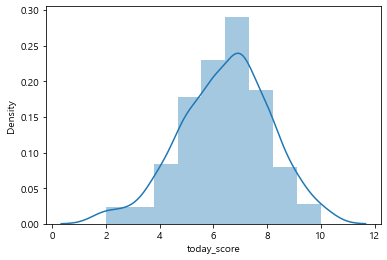

In [9]:
sns.distplot(df['today_score'])

<AxesSubplot:xlabel='today_score', ylabel='count'>

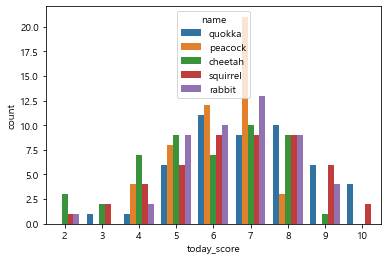

In [10]:
sns.countplot(x='today_score', hue ="name", data=df)

### ÎèÖÎ¶Ω Î≥ÄÏàò_Î≤îÏ£ºÌòï Î≥ÄÏàò

In [11]:
# Î≥ÄÏàò ÌòïÏù¥ obhectÏù∏ Ïª¨Îüº Ï∂îÏ∂ú
object_feature = [ col for col in df.columns if df[col].dtypes == "object"]
object_feature

['name',
 'dayofweek',
 'dayofweek_check',
 'precipitation_check',
 'class_check',
 'gotobed_time',
 'getup_time',
 'morning_routine',
 'weather_prefer',
 'yesterday_exercise',
 'yesterday_drinking',
 'period',
 'caffeine',
 'gotobed_range',
 'getup_range',
 'gotobed_late',
 'getup_early']

In [12]:
# name, gotbed_time, getup_time Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
category_feature = list(set(object_feature) - set(['name','gotobed_time','getup_time']))
category_feature

['morning_routine',
 'class_check',
 'getup_range',
 'dayofweek',
 'yesterday_drinking',
 'gotobed_range',
 'dayofweek_check',
 'yesterday_exercise',
 'getup_early',
 'caffeine',
 'precipitation_check',
 'weather_prefer',
 'gotobed_late',
 'period']

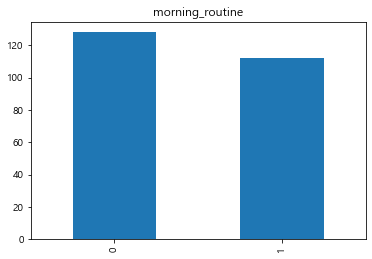

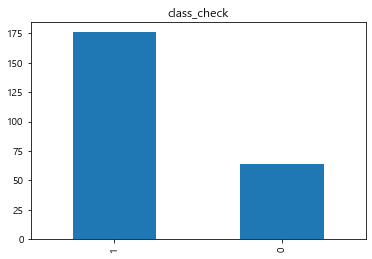

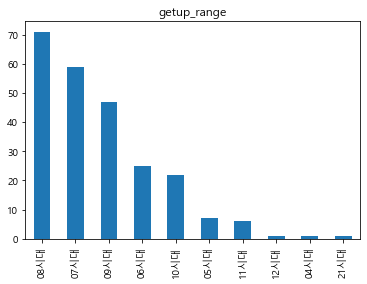

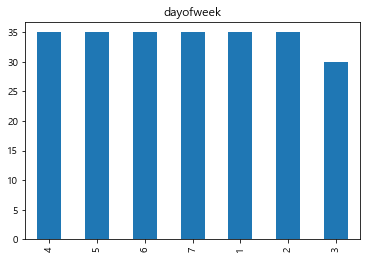

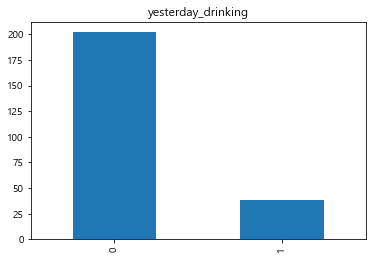

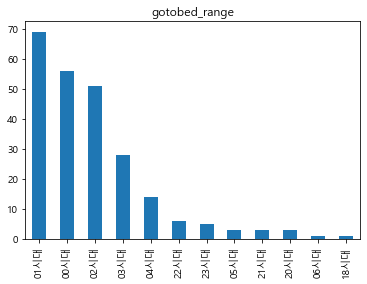

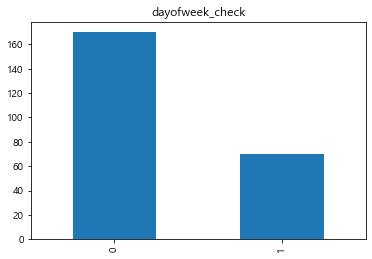

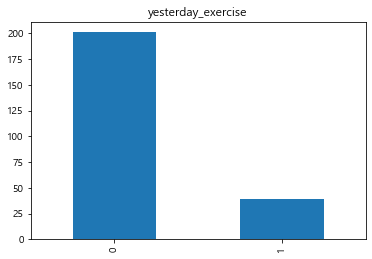

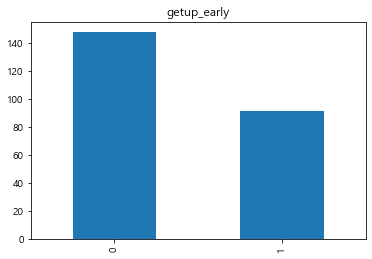

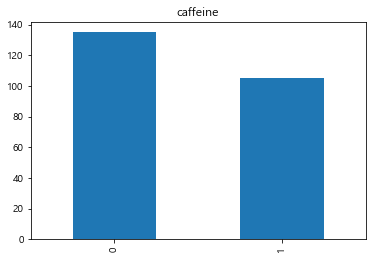

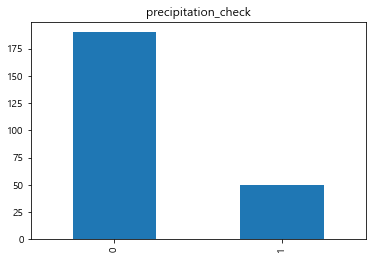

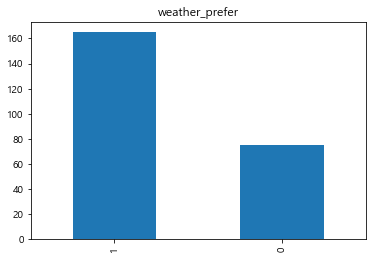

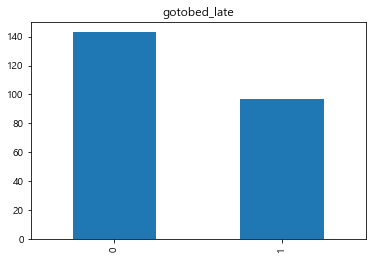

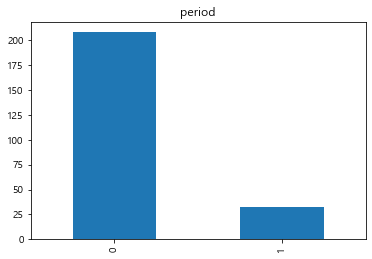

In [13]:
# Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏
for col in category_feature:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

* Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÌè¨ Ìï¥ÏÑù 
    * morning_routine : Î™®ÎãùÎ£®Ìã¥ÏùÑ Ïïà Ìïú ÎÇ†Ïù¥ Ìïú ÎÇ† Î≥¥Îã§ ÎßéÎã§.
    * class_check : ÏàòÏóÖÏùÑ Ìïú ÎÇ†Ïù¥ Ïïà Ìïú ÎÇ†Î≥¥Îã§ ÎßéÎã§. 
    * getup_range : Í∏∞ÏÉÅ ÏãúÍ∞ÑÏùÄ 08Ïãú -> 07Ïãú -> 09Ïãú ÏàúÏúºÎ°ú ÎßéÎã§. 
    * dayofweek 
    * yesterday_drinking : Ïñ¥Ï†ú Ïà†ÏùÑ Ïïà ÎßàÏã† ÎÇ†Ïù¥ ÎßàÏã† ÎÇ†Î≥¥Îã§ ÎßéÎã§.
    * gotobed_range : Ï∑®Ïπ®ÏãúÍ∞ÑÏùÄ 01Ïãú -> 00Ïãú -> 02Ïãú ÏàúÏúºÎ°ú ÎßéÎã§.
    * dayofweek_check 
    * yesterday_exercise : Ïñ¥Ï†ú Ïö¥ÎèôÏùÑ Ïïà Ìïú ÎÇ†Ïù¥ Ìïú ÎÇ† Î≥¥Îã§ ÎßéÎã§. 
    * getup_early : Ïò§Ï†Ñ 8Ïãú Ïù¥ÌõÑ(8Ïãú Ìè¨Ìï®)Ïóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞Í∞Ä Îçî ÎßéÎã§.
    * caffeine : Ïπ¥ÌéòÏù∏ÏùÑ ÏÑ≠Ï∑®ÌïòÏßÄ ÏïäÏùÄ ÎÇ†Ïù¥ ÏÑ≠Ï∑®Ìïú ÎÇ† Î≥¥Îã§ ÎßéÎã§.
    * precipitation_check : ÎπÑÍ∞Ä Ïïà Ïò® ÎÇ†Ïù¥ ÎπÑ Ïò® ÎÇ† Î≥¥Îã§ ÎßéÎã§.
    * weather_prefer : Ïò§Îäò ÎÇ†Ïî®Í∞Ä ÎßòÏóê Îì† ÎÇ†Ïù¥ ÎßòÏóê Îì§ÏßÄ ÏïäÏùÄ ÎÇ† Î≥¥Îã§ ÎßéÎã§. 
    * gotobed_late : Ïò§Ï†Ñ 2Ïãú Ïù¥Ï†Ñ(2Ïãú Ìè¨Ìï®x)Ïóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞Í∞Ä Îçî ÎßéÎã§. 
    * period

### ÎèÖÎ¶Ω Î≥ÄÏàò_ÏàòÏπòÌòï Î≥ÄÏàò 

In [14]:
# Ï†ÑÏ≤¥ Î≥ÄÏàòÏ§ë objectÎ≥ÄÏàò Ï†úÏô∏, today_score,cnt, dateÎèÑ Ï†úÏô∏
numerical_feature = list(set(df.columns) - set(object_feature) - set(['cnt','date','today_score']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt'], dtype='<U23')

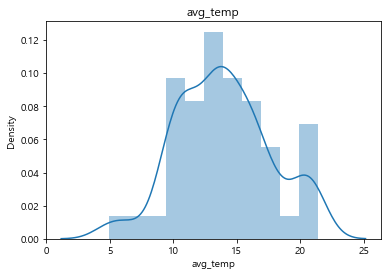

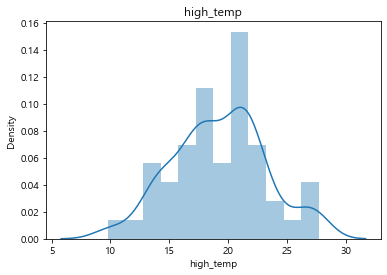

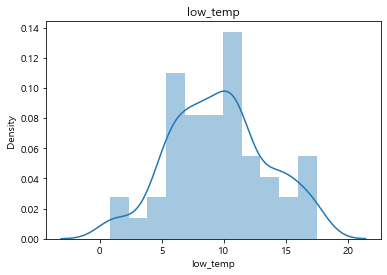

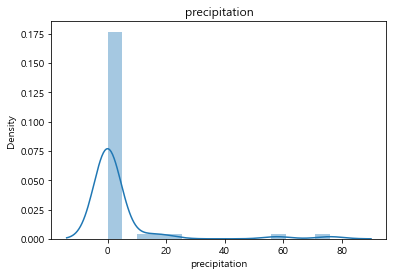

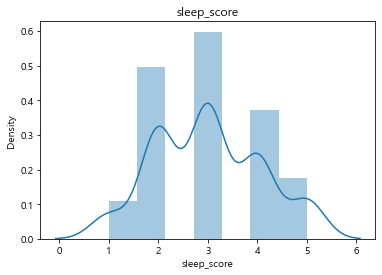

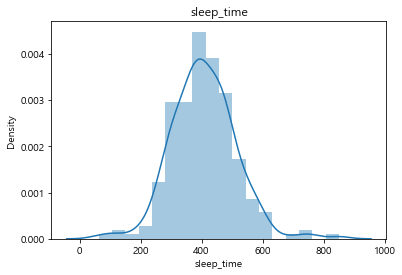

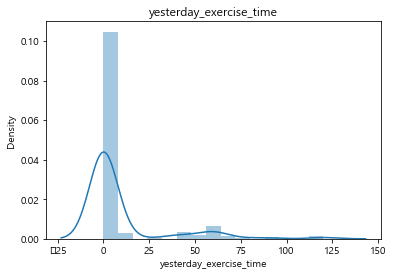

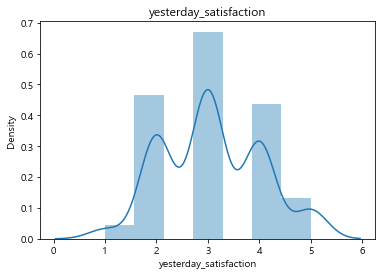

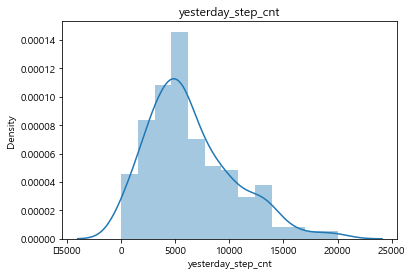

In [15]:
# ÏàòÏπòÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏
for col in numerical_feature:
    sns.distplot(df.loc[df[col].notnull(), col])
    plt.title(col)
    plt.show()

# ÏÉÅÍ¥ÄÎ∂ÑÏÑù 

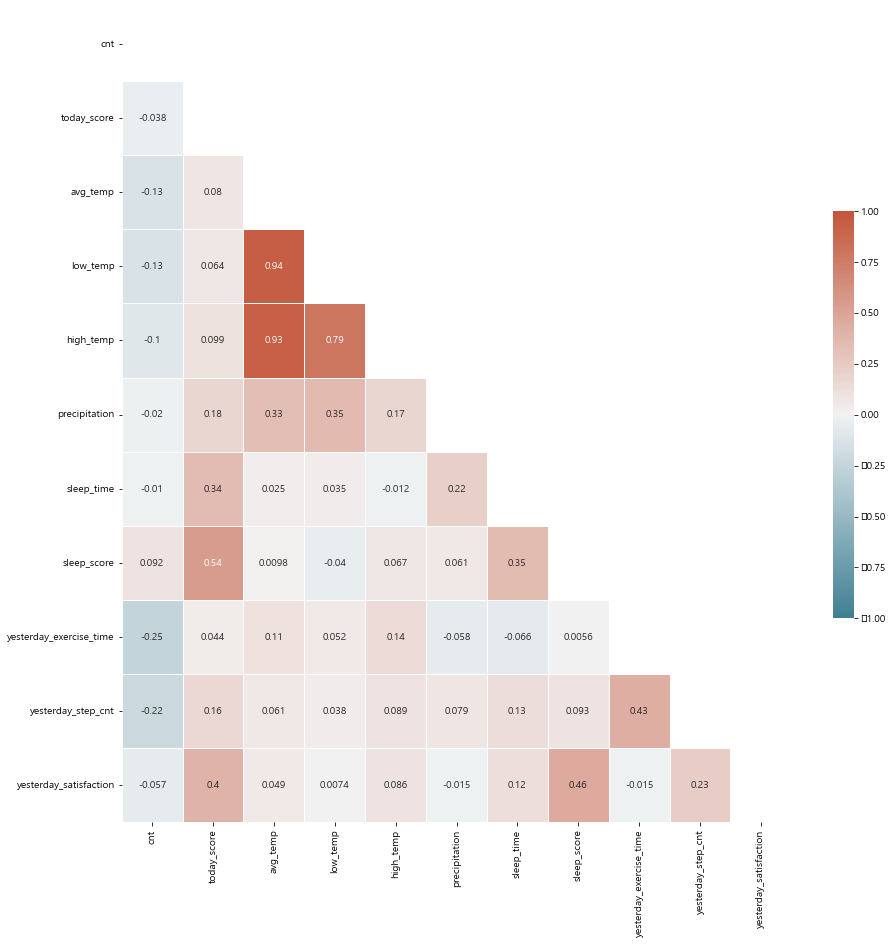

In [16]:
tmp = df.corr()
# Í∑∏Î¶º ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
fig, ax = plt.subplots( figsize=(15,15) )

# ÏÇºÍ∞ÅÌòï ÎßàÏä§ÌÅ¨Î•º ÎßåÎì†Îã§(ÏúÑ Ï™Ω ÏÇºÍ∞ÅÌòïÏóê True, ÏïÑÎûò ÏÇºÍ∞ÅÌòïÏóê False)
mask = np.zeros_like(tmp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# ÌûàÌä∏Îßµ ÌåîÎ†àÌä∏ ÏÉâÏÉÅ Î∂àÎü¨Ïò§Í∏∞
cmap = sns.diverging_palette(220, 20, as_cmap=True)


# ÌûàÌä∏ÎßµÏùÑ Í∑∏Î¶∞Îã§
sns.heatmap(tmp , 
            annot = True,   # Ïã§Ï†ú Í∞íÏùÑ ÌëúÏãúÌïúÎã§
            mask=mask,      # ÌëúÏãúÌïòÏßÄ ÏïäÏùÑ ÎßàÏä§ÌÅ¨ Î∂ÄÎ∂ÑÏùÑ ÏßÄÏ†ïÌïúÎã§
            linewidths=.5,  # Í≤ΩÍ≥ÑÎ©¥ Ïã§ÏÑ†ÏúºÎ°ú Íµ¨Î∂ÑÌïòÍ∏∞
            cbar_kws={"shrink": .5},# Ïª¨Îü¨Î∞î ÌÅ¨Í∏∞ Ï†àÎ∞òÏúºÎ°ú Ï§ÑÏù¥Í∏∞
            cmap = cmap,
            vmin = -1,vmax = 1   # Ïª¨Îü¨Î∞î Î≤îÏúÑ -1 ~ 1
           )  
plt.show()


* ÏÉÅÍ¥Ä Î∂ÑÏÑù Ìï¥ÏÑù 
    * Ïò§Îäò ÎÇòÏùò Ï†êÏàò(today_score)ÏôÄÎäî sleep_time(ÏàòÎ©¥ÏãúÍ∞Ñ), sleep_score(ÏàòÎ©¥ Ï†êÏàò), yesterday_satisfaction(Ï†ÑÎÇ† ÎßåÏ°±ÎèÑ)Í∞Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 
    * ÌèâÍ∑†Í∏∞Ïò®(avg_temp)Í≥º ÏµúÍ≥†Í∏∞Ïò®(high_temp), ÏµúÏ†ÄÍ∏∞Ïò®(low_temp)ÏùÄ Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÎèÑ ÎÜíÍ≤å ÎÇòÏò¨ Í≤É Í∞ôÏïÑÏÑú, Îã§Ï§ëÌöåÍ∑ÄÏóê ÎÑ£ÏùÑ Îïå Ï≤¥ÌÅ¨Ìï¥Î¥êÏïºÍ≤†Îã§.
    * sleep_score(ÏàòÎ©¥ Ï†êÏàò)ÏôÄ yesterday_satisfaction(Ï†ÑÎÇ† ÎßåÏ°±ÎèÑ)Í∞Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 
    * sleep_score(ÏàòÎ©¥ Ï†êÏàò)ÏôÄ sleep_time(ÏàòÎ©¥ÏãúÍ∞Ñ)Ïù¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 
    * yesterday_step_cnt(Ï†ÑÎÇ† Í±∏ÏùåÏàò)ÏôÄ yesterday_exercise_time(Ï†ÑÎÇ† Ïö¥ÎèôÏãúÍ∞Ñ)Ïù¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 

# ÏôúÎèÑ ÌôïÏù∏
- ÏôúÎèÑÍ∞Ä -2~2ÏÇ¨Ïù¥Ïóê ÏûàÏúºÎ©¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÎßåÏ°±ÌïúÎã§Í≥† Î≥∏Îã§. 
- Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÎßåÏ°±ÌïòÏßÄ ÏïäÎäî Í∞íÏùÄ logÎ•º ÏîåÏö∞Îäî Í≤ÉÏùÑ Í≥†Î†§Ìï¥Î≥¥Ïûê.

In [17]:
df.skew()

cnt                        0.000000
today_score               -0.297222
dayofweek                 -0.028646
dayofweek_check            0.922474
avg_temp                   0.093974
low_temp                   0.065016
high_temp                  0.015958
precipitation              4.231705
precipitation_check        1.445419
class_check               -1.061938
sleep_time                 0.355849
morning_routine            0.134473
weather_prefer            -0.814137
sleep_score                0.176270
yesterday_exercise         1.841248
yesterday_exercise_time    2.795109
yesterday_step_cnt         0.883241
yesterday_drinking         1.883666
period                     2.170869
caffeine                   0.253564
yesterday_satisfaction     0.180137
gotobed_late               0.393035
getup_early                0.482937
dtype: float64

* Í≤∞Í≥º : Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ï†úÏô∏ÌïòÍ≥† precipitation, yesterday_exercise_time

# Îã®Ïùº ÏÑ†Ìòï ÌöåÍ∑Ä

## Î≤îÏ£ºÌòï Î≥ÄÏàò

In [18]:
#Î≤îÏ£ºÌòï Î≥ÄÏàò Ï∂úÎ†•
category_feature

['morning_routine',
 'class_check',
 'getup_range',
 'dayofweek',
 'yesterday_drinking',
 'gotobed_range',
 'dayofweek_check',
 'yesterday_exercise',
 'getup_early',
 'caffeine',
 'precipitation_check',
 'weather_prefer',
 'gotobed_late',
 'period']

* üéâÏùòÎØ∏ : p-valueÍ∞Ä 0.05ÎØ∏ÎßåÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®, Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å

### üéâ dayofweek : ÏöîÏùº (ÏùºÏöîÏùº = 1 ~ ÌÜ†ÏöîÏùº = 7)
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.04(4%)
* Ìï¥ÏÑù1(p-value 0.05Í∏∞Ï§Ä) : ÏùºÏöîÏùºÍ≥º ÌôîÏöîÏùºÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, ÌôîÏöîÏùºÏù¥ ÏùºÏöîÏùºÎ≥¥Îã§ 1.3Ï†ê ÎÇÆÏùå
* Ìï¥ÏÑù2(p-value 0.06Í∏∞Ï§Ä) : ÏùºÏöîÏùºÍ≥º ÏõîÏöîÏùºÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, ÏõîÏöîÏùºÏù¥ ÏùºÏöîÏùºÎ≥¥Îã§ 0.7Ï†ê ÎÇÆÏùå

In [19]:
test = ols('today_score ~ C(dayofweek)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.857
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0105
Time:                        23:17:59   Log-Likelihood:                -452.94
No. Observations:                 240   AIC:                             919.9
Df Residuals:                     233   BIC:                             944.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.9143      0.27

### üéâ dayofweek_check : Ï£ºÎßê Ïó¨Î∂Ä (Ï£ºÎßê = 1 , Ï£ºÎßê x = 0)
* Í∞ÄÏÑ§ : Ï£ºÎßêÏù¥ ÌèâÏùºÎ≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§.
<br><br/>
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.02(2%)
* Ìï¥ÏÑù: Ï£ºÎßêÍ≥º ÌèâÏùºÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, ÌèâÏùºÏù¥ Ï£ºÎßêÎ≥¥Îã§ 0.6Ï†ê ÎÜíÏùå
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Ï£ºÎßêÏóê Í¥ÄÍ≥Ñ ÏóÜÏù¥ ÌîÑÎ°úÏ†ùÌä∏Í∞Ä Ïù¥Ïñ¥ÏßÄÎäî ÏùºÏ†ïÏù¥Ïñ¥ÏÑú Ï£ºÎßê Ïó¨Î∂ÄÍ∞Ä ÌÅ∞ ÏòÅÌñ•Ïù¥ ÏóÜÎçò Í±∏Î°ú Î≥¥Ïù∏Îã§.

In [20]:
test = ols('today_score ~ C(dayofweek_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.472
Date:                Sun, 20 Nov 2022   Prob (F-statistic):            0.00674
Time:                        23:20:23   Log-Likelihood:                -457.75
No. Observations:                 240   AIC:                             919.5
Df Residuals:                     238   BIC:                             926.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

###  precipitation_check : Í∞ïÏàò Ïó¨Î∂Ä (Í∞ïÏàò = 1 , Í∞ïÏàò x = 0)
* Í∞ÄÏÑ§ : ÎπÑ Ïïà Ïò§Îäî ÎÇ†Ïù¥ ÎπÑÏò§Îäî ÎÇ†Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§.
<br> <br/>
* Ìï¥ÏÑù : ÎπÑÏò§Îäî ÎÇ†Í≥º ÎπÑ ÏïàÏò§Îäî ÎÇ†Ïù¥ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : ÎπÑ Ïò§Îäî ÎÇ†Ïù¥ Î™áÏùº ÏóÜÏóàÍ≥†, Ïò® ÎÇ† ÎèÑ Ïò§Îäò ÎÇòÏùò Ï†êÏàòÎ•º Îß§Í∏∞Îäî ÏïÑÏπ®Ïóê ÏôîÎäîÏßÄ Ïïå Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ï∞®Ïù¥Í∞Ä ÏóÜÎäî Í≤∞Í≥ºÍ∞Ä ÎèÑÏ∂úÎêú Í≤É Í∞ôÎã§. 

In [21]:
test = ols('today_score ~ C(precipitation_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.02058
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.886
Time:                        23:23:53   Log-Likelihood:                -461.45
No. Observations:                 240   AIC:                             926.9
Df Residuals:                     238   BIC:                             933.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### üéâ class : ÏàòÏóÖ Ïó¨Î∂Ä (ÏàòÏóÖ Ïïà ÌïòÎäî ÎÇ† = 0, ÏàòÏóÖ ÌïòÎäî ÎÇ† = 1)
* Í∞ÄÏÑ§ : ÏàòÏóÖÏùÑ Ïïà ÌïòÎäî ÎÇ†Ïù¥ ÌïòÎäî ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.03(3%)
* Ìï¥ÏÑù : ÏàòÏóÖ ÌïòÎäî ÎÇ†Í≥º ÏàòÏóÖ ÏïàÌïòÎäî ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, ÏàòÏóÖ ÌïòÎäî ÎÇ†Ïù¥ ÏàòÏóÖ Ïïà ÌïòÎäî ÎÇ†Î≥¥Îã§ 0.7Ï†ê ÎÇÆÏùå

In [19]:
test = ols('today_score ~ C(class_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.817
Date:                Sat, 19 Nov 2022   Prob (F-statistic):            0.00329
Time:                        00:46:04   Log-Likelihood:                -457.10
No. Observations:                 240   AIC:                             918.2
Df Residuals:                     238   BIC:                             925.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.9688      0.204  

### morning_routine : Î™®ÎãùÎ£®Ìã¥ Ïã§Ìñâ Ïó¨Î∂Ä (Î™®ÎãùÎ£®Ìã¥ x = 0, Î™®ÎãùÎ£®Ìã¥ o = 1)
* Í∞ÄÏÑ§ : Î™®ÎãùÎ£®Ìã¥ÏùÑ Ìïú ÎÇ†Ïù¥ Ïïà ÌïòÎäî ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* Ìï¥ÏÑù: Î™®ÎãùÎ£®Ìã¥ÏùÑ Ìïú ÎÇ†Í≥º ÏïàÌïòÎäî ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Î™®ÎãùÎ£®Ìã¥ÏùÑ Ïïà Ìïú ÎÇ†Ïù¥ Îçî ÎßéÏïòÍ∏∞ ÎïåÎ¨∏Ïóê, Ïïà Ìïú ÎÇ†Ïù¥ Í≥ÑÏÜç Ïù¥Ïñ¥ÏßÄÍ≤å ÎêòÎ©¥ÏÑú ÌïòÎì† ÏïàÌïòÎì† Î¨¥ÎéåÏ°åÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îü∞ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò® Í≤É Í∞ôÎã§. 

In [22]:
test = ols('today_score ~ C(morning_routine)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.862
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0920
Time:                        23:29:17   Log-Likelihood:                -460.03
No. Observations:                 240   AIC:                             924.1
Df Residuals:                     238   BIC:                             931.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### yesterday_exercise : Ï†ÑÏùº Ïö¥Îèô Ïó¨Î∂Ä (Ï†ÑÏùº Ïö¥Îèô x = 0, Ï†ÑÏùº Ïö¥Îèô o = 1)
* Í∞ÄÏÑ§ : Ï†ÑÏùº Ïö¥ÎèôÏùÑ Ïïà Ìïú ÎÇ†Ïù¥ Ìïú ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* Ìï¥ÏÑù: Ï†ÑÏùº Ïö¥ÎèôÏùÑ Ìïú ÎÇ†Í≥º ÏïàÌïú ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Ï†ÑÏùº Ïö¥ÎèôÏùÑ Ïïà Ìïú ÎÇ†Ïù¥ Îçî ÎßéÏïòÍ∏∞ ÎïåÎ¨∏Ïóê, Ïïà Ìïú ÎÇ†Ïù¥ Í≥ÑÏÜç Ïù¥Ïñ¥ÏßÄÍ≤å ÎêòÎ©¥ÏÑú ÌïòÎì† ÏïàÌïòÎì† Î¨¥ÎéåÏ°åÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îü∞ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò® Í≤É Í∞ôÎã§.

In [23]:
test = ols('today_score ~ C(yesterday_exercise)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.002245
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.962
Time:                        23:29:28   Log-Likelihood:                -461.46
No. Observations:                 240   AIC:                             926.9
Df Residuals:                     238   BIC:                             933.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### üéâyesterday_drinking : Ï†ÑÎÇ† ÏùåÏ£º Ïó¨Î∂Ä (Ï†ÑÎÇ† ÏùåÏ£º x = 0, Ï†ÑÎÇ† ÏùåÏ£º o = 1)
* Í∞ÄÏÑ§ : Ï†ÑÎÇ† ÏùåÏ£ºÎ•º Ïïà Ìïú ÎÇ†Ïù¥ Ìïú ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.01(1%)
* Ìï¥ÏÑù(p-value 0.06Í∏∞Ï§Ä) : Ï†ÑÎÇ† ÏùåÏ£ºÎ•º Ìïú ÎÇ†Í≥º Ï†ÑÎÇ† ÏùåÏ£º ÏïàÌïú ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ÑÎÇ† ÏùåÏ£º ÌïòÎäî ÎÇ†Ïù¥ Ï†ÑÎÇ† ÏùåÏ£º Ïïà ÌïòÎäî Í≤É Î≥¥Îã§ 0.5Ï†ê ÎÜíÏùå

In [24]:
test = ols('today_score ~ C(yesterday_drinking)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.683
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0562
Time:                        23:30:20   Log-Likelihood:                -459.62
No. Observations:                 240   AIC:                             923.2
Df Residuals:                     238   BIC:                             930.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### period : ÏÉùÎ¶¨ Ïó¨Î∂Ä (ÏÉùÎ¶¨ x = 0, ÏÉùÎ¶¨ o = 1)
* Í∞ÄÏÑ§ : ÏÉùÎ¶¨Î•º ÏïàÌïòÎäî ÎÇ†Ïù¥ ÌïòÎäî ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* Ìï¥ÏÑù: ÏÉùÎ¶¨Î•º ÏïàÌïòÎäî ÎÇ†Í≥º ÌïòÎäî ÎÇ†Ïù¥ Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [25]:
test = ols('today_score ~ C(weather_prefer)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01097
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.917
Time:                        23:32:37   Log-Likelihood:                -461.46
No. Observations:                 240   AIC:                             926.9
Df Residuals:                     238   BIC:                             933.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

### caffeine : Ïπ¥ÌéòÏù∏ ÏÑ≠Ï∑® Ïó¨Î∂Ä (Ïπ¥ÌéòÏù∏ x = 0, Ïπ¥ÌéòÏù∏ o = 1)
* Í∞ÄÏÑ§ : Ïπ¥ÌéòÏù∏ÏùÑ ÏÑ≠Ï∑® Ìïú ÎÇ†Ïù¥ Ïïà Ìïú ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* Ìï¥ÏÑù: Ïπ¥ÌéòÏù∏ÏùÑ ÏÑ≠Ï∑® Ìïú ÎÇ†Í≥º Ïïà Ìïú ÎÇ†Ïù¥ Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [23]:
test = ols('today_score ~ C(caffeine)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.669
Date:                Sat, 19 Nov 2022   Prob (F-statistic):              0.104
Time:                        01:19:15   Log-Likelihood:                -460.13
No. Observations:                 240   AIC:                             924.3
Df Residuals:                     238   BIC:                             931.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.2963      0.142  

### üéâgotobed_range : Ï∑®Ïπ® ÏãúÍ∞ÑÎåÄ
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.06(6%)
<br><br/>
* Ìï¥ÏÑù1 : 00ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÏôÄ 18ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 18ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÍ∞Ä 00ÏãúÏóê Ï∑®Ïπ®Ìï† Îïå Î≥¥Îã§ 4.4Ï†ê ÎÇÆÏùå
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : 18ÏãúÏóê Ï∑®Ïπ® ÌñàÏùÑ ÎïåÍ∞Ä 1Î≤à ÏûàÏóàÎäîÎç∞, Îã§ÎûåÏ•êÎãòÏù¥ Ïù¥ Îïå 18ÏãúÏóê Ï∑®Ïπ®Ìï¥ÏÑú 21ÏãúÏóê Í∏∞ÏÉÅÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÍ≤å ÎÇòÏôÄÏÑú Í≤∞Í≥ºÍ∞Ä Ïù¥Î†áÍ≤å ÎÇòÏôîÎã§.
<br><br/>
* Ìï¥ÏÑù2 : 00ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÏôÄ 20ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 20ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÍ∞Ä 00ÏãúÏóê Ï∑®Ïπ®Ìï† Îïå Î≥¥Îã§ 2.2Ï†ê ÎÜíÏùå 
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : 20ÏãúÏóê Ï∑®Ïπ® ÌñàÏùÑ ÎïåÎäî 3Î≤à ÏûàÏóàÎäîÎç∞, ÏπòÌÉÄ, ÌÜ†ÎÅº, Îã§ÎûåÏ•êÎãò Î™®Îëê ÏùºÏ∞ç Ïû†ÏûêÎ¶¨Ïóê Îì§Ïñ¥ Ìëπ Ïûò Ïû§Í∏∞Ïóê Ïò§Îäò ÎÇòÏùò Ï†êÏàòÎ•º ÎÜíÍ≤å Ï§òÏÑú Í≤∞Í≥ºÍ∞Ä Ïù¥Î†áÍ≤å ÎÇòÏôîÎã§.

In [38]:
test = ols('today_score ~ C(gotobed_range)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.394
Date:                Mon, 21 Nov 2022   Prob (F-statistic):            0.00795
Time:                        00:07:47   Log-Likelihood:                -448.35
No. Observations:                 240   AIC:                             920.7
Df Residuals:                     228   BIC:                             962.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### gotobed_late: Îä¶Í≤å Ï∑®Ïπ®ÌñàÎäîÏßÄ Ïó¨Î∂Ä 
(Ïò§Ï†Ñ 2Ïãú Ïù¥Ï†ÑÏóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞(2Ïãú Ìè¨Ìï®X)=0, Ïò§Ï†Ñ 2Ïãú Ïù¥ÌõÑÏóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞(2Ïãú Ìè¨Ìï®o)=1)
<br><br/>
* Í∞ÄÏÑ§ : Îä¶Í≤å Ï∑®Ïπ®Ìï† ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ÉÏù¥Îã§.
* Ìï¥ÏÑù : Îä¶Í≤å Ï∑®Ïπ® Ìïú ÎÇ†Í≥º Îä¶Í≤å Ï∑®Ïπ®ÌïòÏßÄ ÏïäÏùÄ ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [39]:
test = ols('today_score ~ C(gotobed_late)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.007
Date:                Mon, 21 Nov 2022   Prob (F-statistic):              0.317
Time:                        00:07:55   Log-Likelihood:                -460.96
No. Observations:                 240   AIC:                             925.9
Df Residuals:                     238   BIC:                             932.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.5385 

### üéâgetup_range              : Í∏∞ÏÉÅ ÏãúÍ∞ÑÎåÄ
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.05(5%)
<br><br/>
* Ìï¥ÏÑù1 : 04ÏãúÏóê Í∏∞ÏÉÅÌï† ÎïåÏôÄ 21ÏãúÏóê Í∏∞ÏÉÅÌï† ÎïåÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 21ÏãúÏóê Í∏∞ÏÉÅÌï† ÎïåÍ∞Ä 04ÏãúÏóê Í∏∞ÏÉÅÌï† Îïå Î≥¥Îã§ 7Ï†ê ÎÇÆÏùå
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : 21ÏãúÏóê Í∏∞ÏÉÅ ÌñàÏùÑ ÎïåÍ∞Ä 1Î≤à ÏûàÏóàÎäîÎç∞, Îã§ÎûåÏ•êÎãòÏù¥ Ïù¥ Îïå 18ÏãúÏóê Ï∑®Ïπ®Ìï¥ÏÑú 21ÏãúÏóê Í∏∞ÏÉÅÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÍ≤å ÎÇòÏôÄÏÑú Í≤∞Í≥ºÍ∞Ä Ïù¥Î†áÍ≤å ÎÇòÏôîÎã§.

In [40]:
test = ols('today_score ~ C(getup_range)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.505
Date:                Mon, 21 Nov 2022   Prob (F-statistic):            0.00943
Time:                        00:10:05   Log-Likelihood:                -450.24
No. Observations:                 240   AIC:                             920.5
Df Residuals:                     230   BIC:                             955.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9

### getup_early              : ÏùºÏ∞ç Í∏∞ÏÉÅ ÌñàÎäîÏßÄ Ïó¨Î∂Ä 
(Ïò§Ï†Ñ 8Ïãú Ïù¥ÌõÑÏóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞(8Ïãú Ìè¨Ìï®O)=0, Ïò§Ï†Ñ 8Ïãú Ïù¥Ï†ÑÏóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞(8Ïãú Ìè¨Ìï®X)=1 
<br><br/>
* Í∞ÄÏÑ§ : ÏùºÏ∞ç Í∏∞ÏÉÅÌï† ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ÉÏù¥Îã§.
* Ìï¥ÏÑù : ÏùºÏ∞ç Í∏∞ÏÉÅ Ìïú ÎÇ†Í≥º ÏùºÏ∞ç Í∏∞ÏÉÅÌïòÏßÄ ÏïäÏùÄ ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [41]:
test = ols('today_score ~ C(getup_early)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.948
Date:                Mon, 21 Nov 2022   Prob (F-statistic):              0.164
Time:                        00:12:47   Log-Likelihood:                -460.49
No. Observations:                 240   AIC:                             925.0
Df Residuals:                     238   BIC:                             931.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5676    

## ÏàòÏπòÌòï Î≥ÄÏàò

In [26]:
numerical_feature

array(['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt'], dtype='<U23')

* üéâÏùòÎØ∏ : p-valueÍ∞Ä 0.05ÎØ∏ÎßåÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®, Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å

### avg_temp : ÌèâÍ∑† Í∏∞Ïò® (‚ÑÉ)
* Ìï¥ÏÑù : ÌèâÍ∑† Í∏∞Ïò®Ïóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [27]:
test = ols('today_score ~ avg_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.537
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.216
Time:                        23:34:10   Log-Likelihood:                -460.69
No. Observations:                 240   AIC:                             925.4
Df Residuals:                     238   BIC:                             932.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9541      0.414     14.378      0.0

### low_temp : ÏµúÏ†Ä Í∏∞Ïò® (‚ÑÉ)
* Ìï¥ÏÑù : ÏµúÏ†Ä Í∏∞Ïò®Ïóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [28]:
test = ols('today_score ~ low_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9670
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.326
Time:                        23:36:41   Log-Likelihood:                -460.98
No. Observations:                 240   AIC:                             926.0
Df Residuals:                     238   BIC:                             932.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1902      0.285     21.714      0.0

### high_temp : ÏµúÍ≥† Í∏∞Ïò® (‚ÑÉ)
* Ìï¥ÏÑù : ÏµúÍ≥† Í∏∞Ïò®Ïóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [29]:
test = ols('today_score ~ high_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.334
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.128
Time:                        23:37:15   Log-Likelihood:                -460.29
No. Observations:                 240   AIC:                             924.6
Df Residuals:                     238   BIC:                             931.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6602      0.528     10.722      0.0

### üéâprecipitation : Í∞ïÏàòÎüâ (mm)
* Í∞ÄÏÑ§ : ÎπÑÍ∞Ä ÎßéÏù¥ Ïò¨ ÏàòÎ°ù Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ÉÏù¥Îã§.
<br><br/>
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.01(1%)
* Ìï¥ÏÑù : Í∞ïÏàòÎüâÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, ÎπÑÍ∞Ä ÎßéÏù¥ Ïò¨ ÏàòÎ°ù Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÎã§?!!
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : ÎπÑ Ïò§Îäî ÎÇ†Ïù¥ Î™áÏùº ÏóÜÏóàÍ≥†, Ïò® ÎÇ† ÎèÑ Ïò§Îäò ÎÇòÏùò Ï†êÏàòÎ•º Îß§Í∏∞Îäî ÏïÑÏπ®Ïóê ÏôîÎäîÏßÄ Ïïå Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ÄÏÑ§Ïóê ÎßûÏßÄ ÏïäÏùÄ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò® Í≤É ÏïÑÎãêÍπå???

In [31]:
#8 ÏôúÎèÑ ÌôïÏù∏ Í≤∞Í≥º -2~2 Î≤îÏúÑÏóê Î≤óÏñ¥ÎÇòÏÑú logÎ•º ÏîåÏõÄ
test = ols('today_score ~  np.log1p(precipitation)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.213
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0412
Time:                        23:38:46   Log-Likelihood:                -459.36
No. Observations:                 240   AIC:                             922.7
Df Residuals:                     238   BIC:                             929.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### üéâüéâsleep_time : ÏàòÎ©¥ ÏãúÍ∞Ñ (Í∏∞ÏÉÅÏãúÍ∞Ñ - Ï∑®Ïπ® ÏãúÍ∞Ñ)
* Í∞ÄÏÑ§ : ÏàòÎ©¥ ÏãúÍ∞ÑÏù¥ ÎßéÏùÑ ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÜíÎã§. 
<br><br/>
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.11(11%)
* Ìï¥ÏÑù : ÏàòÎ©¥ ÏãúÍ∞ÑÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 1Î∂Ñ Îçî Ïûò ÏàòÎ°ù 0.0054Ï†ê Ï¶ùÍ∞Ä

In [32]:
test = ols('today_score ~ sleep_time', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     30.92
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           7.21e-08
Time:                        23:41:16   Log-Likelihood:                -446.81
No. Observations:                 240   AIC:                             897.6
Df Residuals:                     238   BIC:                             904.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2698      0.405     10.545      0.0

### üéâüéâsleep_score : ÏàòÎ©¥ Ï†êÏàò (5Ï†ê ÎßåÏ†ê)
* Í∞ÄÏÑ§ : ÏàòÎ©¥ Ï†êÏàòÍ∞Ä ÎÜíÏùÑ ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÜíÎã§. 
<br><br/>
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.29(29%)
* Ìï¥ÏÑù : ÏàòÎ©¥ Ï†êÏàòÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 1Ï†ê Îçî ÎÜíÏùÑ ÏàòÎ°ù 0.8384Ï†ê Ï¶ùÍ∞Ä

In [33]:
test = ols('today_score ~ sleep_score', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     99.12
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           9.58e-20
Time:                        23:41:23   Log-Likelihood:                -419.68
No. Observations:                 240   AIC:                             843.4
Df Residuals:                     238   BIC:                             850.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.9314      0.269     14.639      

### yesterday_exercise_time : Ï†ÑÏùº Ïö¥Îèô ÏãúÍ∞Ñ (Î∂Ñ)
* Í∞ÄÏÑ§ : Ï†ÑÏùº Ïö¥ÎèôÏãúÍ∞ÑÏù¥ ÎßéÏùÑ ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÜíÎã§. 
<br><br/>
* Ìï¥ÏÑù : Ï†ÑÏùº Ïö¥Îèô ÏãúÍ∞ÑÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [34]:
#8 ÏôúÎèÑ ÌôïÏù∏ Í≤∞Í≥º -2~2 Î≤îÏúÑÏóê Î≤óÏñ¥ÎÇòÏÑú logÎ•º ÏîåÏõÄ
test = ols('today_score ~ np.log1p(yesterday_exercise_time)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.05744
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.811
Time:                        23:41:31   Log-Likelihood:                -461.43
No. Observations:                 240   AIC:                             926.9
Df Residuals:                     238   BIC:                             933.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

### üéâyesterday_step_cnt : Ï†ÑÎÇ† Í±∏Ïùå Ïàò
* Í∞ÄÏÑ§ : Ï†ÑÎÇ† Í±∏Ïùå ÏàòÍ∞Ä ÎßéÏùÑ ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÎã§. 
<br><br/>
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.02(2%)
* Ìï¥ÏÑù : Ï†ÑÎÇ† Í±∏Ïùå ÏàòÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 1Í±∏Ïùå Îçî Í±∏ÏùÑ ÏàòÎ°ú ÎÜíÏùÑ ÏàòÎ°ù 0.00006504Ï†ê Ï¶ùÍ∞Ä

In [35]:
test = ols('today_score ~ yesterday_step_cnt', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.056
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0146
Time:                        23:42:19   Log-Likelihood:                -458.45
No. Observations:                 240   AIC:                             920.9
Df Residuals:                     238   BIC:                             927.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.0321      0

### üéâüéâyesterday_satisfaction : Ï†ÑÎÇ† ÎßåÏ°±ÎèÑ (5Ï†ê ÎßåÏ†ê)
* Í∞ÄÏÑ§ : Ï†ÑÎÇ† ÎßåÏ°±ÎèÑÍ∞Ä ÎÜíÏùÑ ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÜíÎã§. 
<br><br/>
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.15(15%)
* Ìï¥ÏÑù : Ï†ÑÎÇ† ÎßåÏ°±ÎèÑÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 1Ï†ê Îçî ÎÜíÏùÑ ÏàòÎ°ú ÎÜíÏùÑ ÏàòÎ°ù 0.69Ï†ê Ï¶ùÍ∞Ä

In [36]:
test = ols('today_score ~ yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     44.95
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.46e-10
Time:                        23:42:50   Log-Likelihood:                -440.70
No. Observations:                 240   AIC:                             885.4
Df Residuals:                     238   BIC:                             892.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

# Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏
* Îã§Ï§ë Í≥µÏÑ†ÏÑ±ÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í∞ÑÏùò ÏÉÅÍ¥ÄÏ†ïÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÌÉúÎ•º ÏùòÎØ∏
* Îã§Ï§ë Í≥µÏÑ†ÏÑ±ÏùÑ Í≥†Î†§ÌïòÏßÄ ÏïäÍ≥† ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏàòÌñâÌïú ÌõÑ Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌïòÎ©¥ Î≥ÄÏàòÏùò Ï§ëÏöîÏÑ±ÏùÑ ÏÑ§Î™ÖÌï† Îïå ÏûòÎ™ªÎêú Í≤∞Î°†ÏùÑ ÎÇ¥Î¶¥ Ïàò ÏûàÎã§. 
* vif(Î∂ÑÏÇ∞ÌåΩÏ∞ΩÍ≥ÑÏàò)Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌåΩÏ∞ΩÍ≥ÑÏàòÍ∞Ä 15Ïù¥ÏÉÅÏù∏ Í≤ÉÏùÑ Í≥®ÎùºÎÇ¥Î†§Í≥† ÌïúÎã§.

In [43]:
vif_scaled_test_df = df[['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # Ïó¨Í∏∞Ïóê Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î≥º ÌÖåÏù¥Î∏îÏùÑ ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî
# variance_inflation_factor(X, i) : XiÎ•º xÎÇòÎ®∏ÏßÄÎ°ú ÌöåÍ∑ÄÎ∂ÑÏÑùÌïú ÌõÑ VIFÍ∞íÏùÑ Íµ¨ÌïúÍ≤É. Ï¶â xiÏùò vifÍ∞í. Ï¶â Ïù¥Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù Ï¢ÖÏÜçÏÑ±Ïù¥ ÎÜíÎã§Îäî Îúª
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

VIF_Factor                  Feature
0  921.531491                 avg_temp
1  435.574241                high_temp
2  136.085503                 low_temp
7   14.847813   yesterday_satisfaction
5   14.834856               sleep_time
4   13.277637              sleep_score
8    5.000785       yesterday_step_cnt
3    1.619712            precipitation
6    1.535179  yesterday_exercise_time

* Í≤∞Í≥º : avg_temp, high_temp, low_temp Ï§ëÏóê 1Í∞ú Î≥ÄÏàòÎßå ÏÇ¨Ïö©ÌïòÍ∏∞

# Îã§Ï§ë ÌöåÍ∑Ä Î∂ÑÏÑù
* Ï°∞Í±¥ 1 : Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏ Í≤∞Í≥º avg_temp, high_temp, low_temp Ï§ëÏóê 1Í∞ú Î≥ÄÏàòÎßå ÏÇ¨Ïö©ÌïòÍ∏∞
* Ï°∞Í±¥ 2 : ÌååÏÉù Î≥ÄÏàòÏôÄ ÏõêÎûò Î≥ÄÏàò Ï§ëÏóê 1Í∞úÎßå ÏÇ¨Ïö© ÌïòÍ∏∞ 
    * (1) dayofweek, dayofweek_check
    * (2) precipitation, precipitation_check
    * (3) getup_range, getup_early
    * (4) gotobed_range, gotobed_late

## Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàòÎßå ÏßÑÌñâ
* ÎèÖÎ¶ΩÎ≥ÄÏàò : C(dayofweek_check)+C(class_check)+C(yesterday_drinking)+C(gotobed_range)+C(getup_early)+np.log1p(precipitation)+sleep_time+sleep_score+yesterday_step_cnt+yesterday_satisfaction

In [50]:
test = ols('today_score ~ C(dayofweek_check)+C(class_check)+C(yesterday_drinking)+C(gotobed_range)+C(getup_early)+np.log1p(precipitation)+sleep_time+sleep_score+yesterday_step_cnt+yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     7.554
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           3.72e-16
Time:                        00:41:57   Log-Likelihood:                -398.51
No. Observations:                 240   AIC:                             839.0
Df Residuals:                     219   BIC:                             912.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## ÏµúÏ¢Ö Îã§Ï§ë ÌöåÍ∑ÄÏãù
* ÎèÖÎ¶ΩÎ≥ÄÏàò : sleep_score + sleep_time + yesterday_satisfaction + C(class_check)
* ÏàòÏ†ïrÏ†úÍ≥± : 0.363(36%)
* Ìï¥ÏÑù : Ïò§Îäò ÎÇòÏùò Ï†êÏàòÎ•º ÎÜíÍ≤å ÏãúÏûëÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ï†ÑÎÇ† ÎàÑÍ∞Ä ÏóÖÏñ¥Í∞ÄÎèÑ Î™®Î•º Ï†ïÎèÑÎ°ú Ï∂©Î∂ÑÌïú ÏãúÍ∞Ñ ÎèôÏïà Ìëπ Ïûò ÏûêÍ≥†, Î≥∏Ïù∏Ïù¥ ÎßåÏ°±ÌïòÎäî ÌïòÎ£®Î•º Î≥¥ÎÇ¥ÏïºÌïúÎã§. Îã§Î•∏ Î≥ÄÏàòÎäî ÌÅ∞ ÏòÅÌñ•Ïù¥ ÏóÜÎã§.

In [86]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò : sleep_score + sleep_time + yesterday_satisfaction + C(class_check)
# ÏàòÏ†ïrÏ†úÍ≥± : 0.363
test = ols('today_score ~  sleep_score + sleep_time + yesterday_satisfaction + C(class_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     34.98
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           6.49e-23
Time:                        01:08:05   Log-Likelihood:                -405.40
No. Observations:                 240   AIC:                             820.8
Df Residuals:                     235   BIC:                             838.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3